<a href="https://colab.research.google.com/github/SrivinaySridhar/PY4AIML/blob/main/Sales_Prediction_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sales Prediction Using Linear Regression

### Problem Statement:
Build a model which predicts sales based on the money spent on different platforms for marketing.

In [35]:
### Run the cell to download the data
### you can also take any other dateset of your own and try
!wget https://cdn.talentsprint.com/aiml/PY4AIML/advertising.csv

--2024-01-16 15:28:47--  https://cdn.talentsprint.com/aiml/PY4AIML/advertising.csv
Resolving cdn.talentsprint.com (cdn.talentsprint.com)... 172.105.34.236
Connecting to cdn.talentsprint.com (cdn.talentsprint.com)|172.105.34.236|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cdn.ap-south-1.linodeobjects.com/public_html/aiml/PY4AIML/advertising.csv [following]
--2024-01-16 15:28:48--  https://cdn.ap-south-1.linodeobjects.com/public_html/aiml/PY4AIML/advertising.csv
Resolving cdn.ap-south-1.linodeobjects.com (cdn.ap-south-1.linodeobjects.com)... 172.104.56.205, 139.162.42.49, 139.162.5.246, ...
Connecting to cdn.ap-south-1.linodeobjects.com (cdn.ap-south-1.linodeobjects.com)|172.104.56.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4062 (4.0K) [text/csv]
Saving to: ‘advertising.csv.1’

advertising.csv.1   100%[===================>]   3.97K  --.-KB/s    in 0s      

2024-01-16 15:28:49 (140 MB/s) - ‘advertis

### Exercise 1: Load and understand the data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
### your code here
dataset = pd.read_csv("advertising.csv")
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Exercise 2: Describe the data and check for the null values(if any)

In [5]:
### your code here
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Exercise 3: Split the data into train and test set

In [8]:
### your code here
X = dataset[["TV", "Radio", "Newspaper"]]
# X = dataset.drop(columns = ["Sales"])
y = dataset['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Exercise 4: Visualize the train and test data

TRAIN DATA

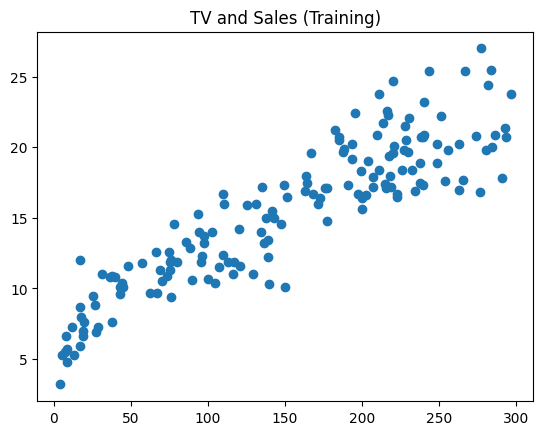

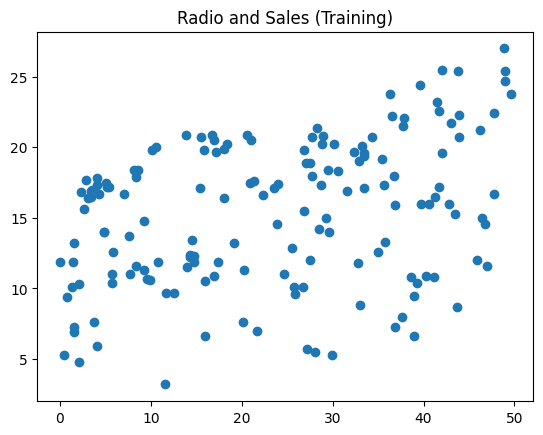

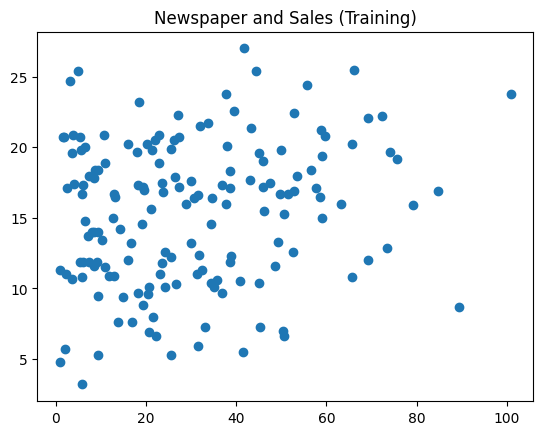

In [19]:
### your code here
# Training Data

for col in X_train.columns:
  plt.title(f"{col} and Sales (Training)")
  plt.scatter(X_train[col], y_train)
  plt.show()

TEST DATA

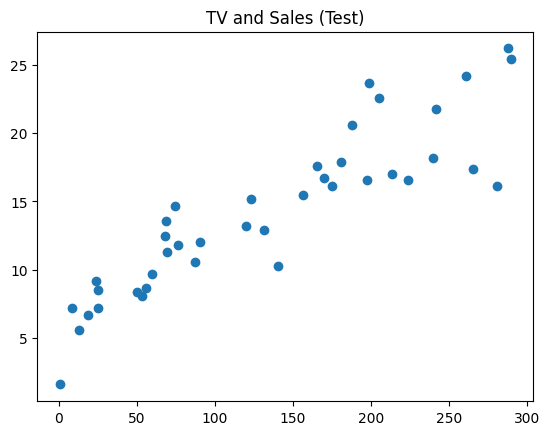

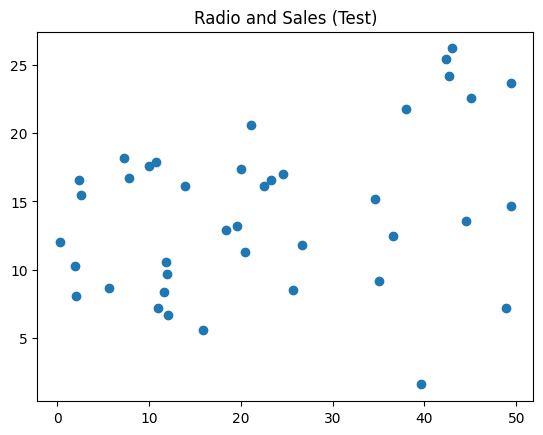

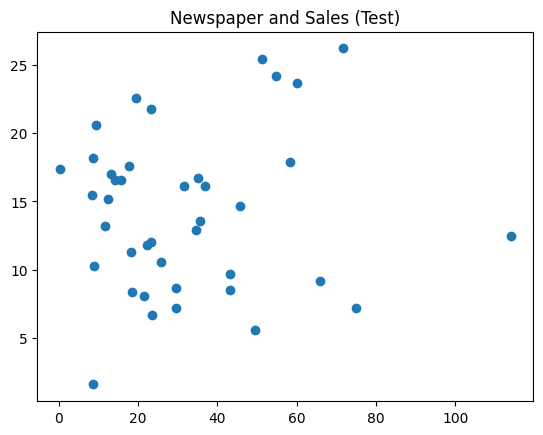

In [20]:
# Test Data
for col in X_test.columns:
  plt.title(f"{col} and Sales (Test)")
  plt.scatter(X_test[col], y_test)
  plt.show()


### Exercise 5: Apply the Linear Regression Model

In [22]:
### your code here
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
df = pd.DataFrame({"Actual Values1: ": y_test, "Predicted Values1: ": y_pred})
print(lr.coef_)
print(lr.intercept_)

[ 0.05368006  0.11152624 -0.00351166]
4.773205203269841


In [23]:
df.head()

,Actual Values1:,Predicted Values1:
18,11.3,10.709889
170,8.4,8.686298
107,12.0,9.577870
98,25.4,24.862080
177,16.7,14.655845


### Exercise 6: Calculate the RMSE value of the model

In [34]:
### your code here
RMSE_val = np.sqrt(mean_squared_error(y_test, y_pred))
print(RMSE_val)
R2score = r2_score(y_test, y_pred)
print(R2score)

2.1266293899128947
0.8645053923967724
